# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']

# count number of disasters in each year for each subgroup
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()

# save index of years
meteorological_disaster_counts_index = meteorological_disaster_counts.index

# sum costs by year
meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

# SPLIT METEOROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in meteorological_data['Disaster Type'].unique():
    print(dtype)

Storm
Extreme temperature


In [5]:
# create new dataframes for each type
storm_data = meteorological_data[meteorological_data['Disaster Type'] == 'Storm']
extreme_temp_data = meteorological_data[meteorological_data['Disaster Type'] == 'Extreme temperature']

# count number of disasters in each year for each subgroup
storm_disaster_counts = storm_data['Year'].value_counts().sort_index()
extreme_temp_disaster_counts = extreme_temp_data['Year'].value_counts().sort_index()

# save index of years
storm_disaster_counts_index = storm_disaster_counts.index
extreme_temp_disaster_counts_index = extreme_temp_disaster_counts.index

# PLOT METEOROLOGICAL DISASTERS

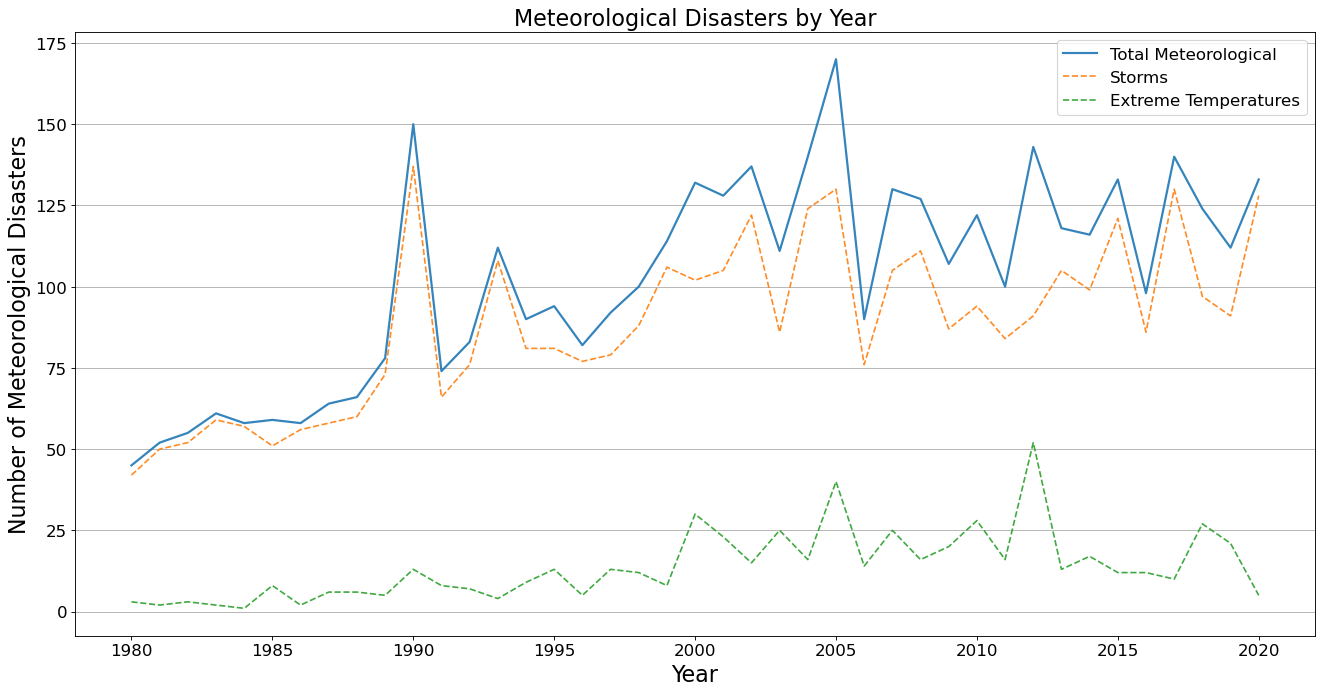

In [6]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Meteorological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Meteorological Disasters")
plt.plot(meteorological_disaster_counts_index,meteorological_disaster_counts, linewidth=2, alpha = 0.9)
plt.plot(storm_disaster_counts_index, storm_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, linestyle = '--', alpha = 0.9)

plt.legend(['Total Meteorological', 'Storms', 'Extreme Temperatures'])

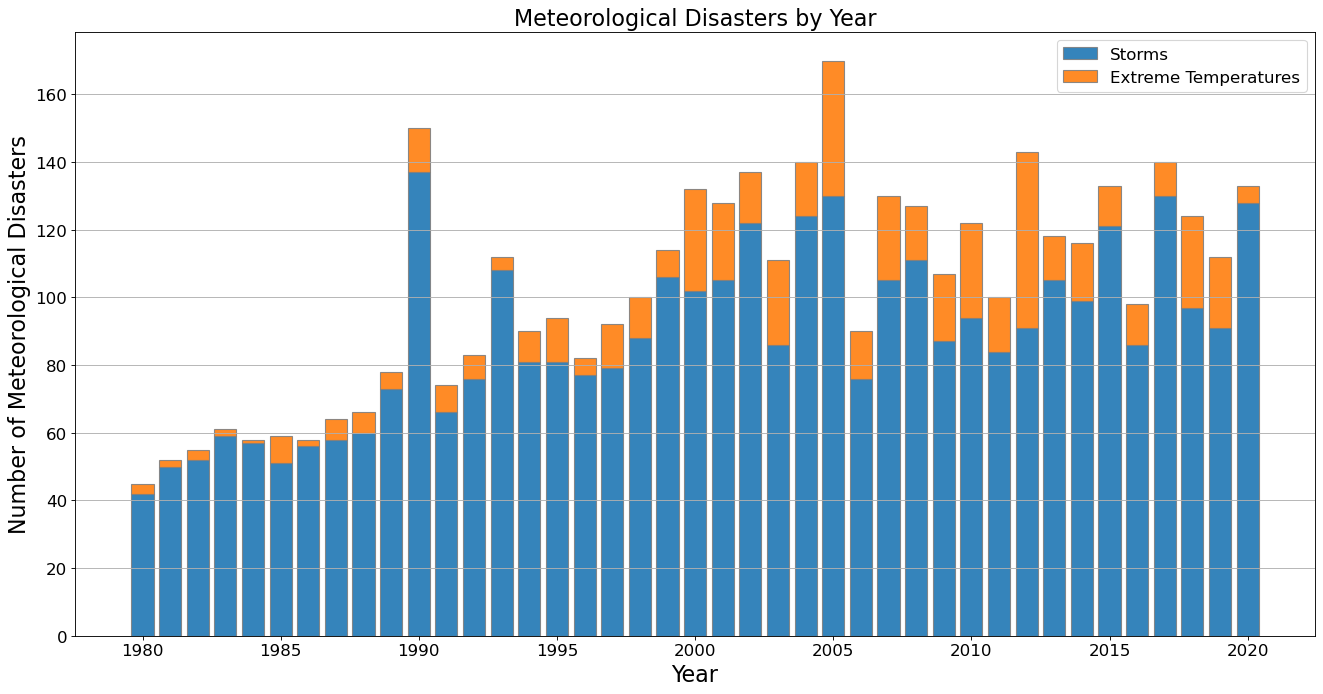

In [7]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Meteorological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Meteorological Disasters")

plt.bar(storm_disaster_counts_index, storm_disaster_counts, edgecolor = 'grey', alpha = 0.9)
plt.bar(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, bottom = storm_disaster_counts, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Storms', 'Extreme Temperatures'])

# BOXPLOT METEOROLOGICAL DISASTERS BY DECADE

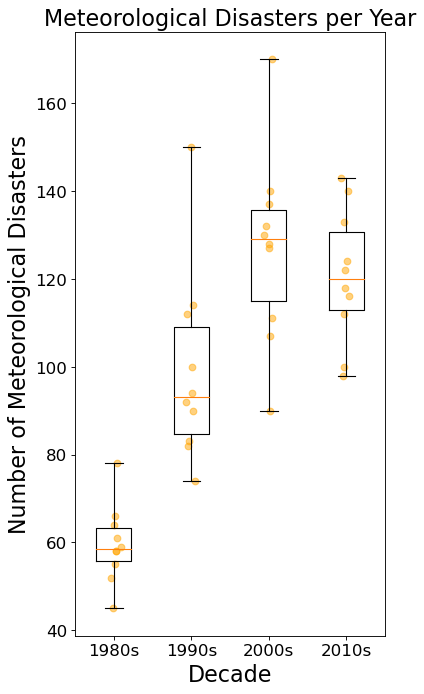

In [8]:
total_box_data = [meteorological_disaster_counts[0:10], meteorological_disaster_counts[10:20], meteorological_disaster_counts[20:30], meteorological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Meteorological Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Meteorological Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE METEOROLOGICAL DISASTER OCCURANCES

In [9]:
# total meteorological change 1980-2020
meteorological_disasters_1980 = meteorological_disaster_counts[1980]
meteorological_disasters_2020 = meteorological_disaster_counts[2020]
meteorological_percent_change_1980_to_2020 = 100*(meteorological_disasters_2020-meteorological_disasters_1980)/meteorological_disasters_1980
print("meteorological Disaster Change (1980-2020): {:.2f}%".format(meteorological_percent_change_1980_to_2020))

# storm change 1980-2020
storms_1980 = storm_disaster_counts[1980]
storms_2020 = storm_disaster_counts[2020]
percent_change_storm_1980_to_2020 = 100*(storms_2020-storms_1980)/storms_1980
print("storm Disaster Change (1980-2020): {:.2f}%".format(percent_change_storm_1980_to_2020))

# extreme temperature change 1980-2020
extreme_temp_1980 = extreme_temp_disaster_counts[1980]
extreme_temp_2020 = extreme_temp_disaster_counts[2020]
percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_2020-extreme_temp_1980)/extreme_temp_1980
print("Extreme Temperature Disaster Change (1980-2020): {:.2f}%".format(percent_change_extreme_temp_1980_to_2020))

# total meteorological statistical data
print("\nmeteorological Statistical Data: ")
print(meteorological_disaster_counts.describe())

# 1980s meteorological statistical data
print("\n1980s meteorological Statistical Data: ")
print(meteorological_disaster_counts[0:10].describe())

# 1990s meteorological statistical data
print("\n1990s meteorological Statistical Data: ")
print(meteorological_disaster_counts[10:20].describe())

# 2000s meteorological statistical data
print("\n2000s meteorological Statistical Data: ")
print(meteorological_disaster_counts[20:30].describe())

# 2010s meteorological statistical data
print("\n2010s meteorological Statistical Data: ")
print(meteorological_disaster_counts[30:40].describe())

print("\n")

# meteorological statistical changes 1980s-2010s
meteorological_mean_1980s = meteorological_disaster_counts[0:10].mean()
meteorological_mean_2010s = meteorological_disaster_counts[30:40].mean()
mean_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_2010s-meteorological_mean_1980s)/meteorological_mean_1980s
print("Mean meteorological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_meteorological_1980_to_2020))

meteorological_max_1980s = meteorological_disaster_counts[0:10].max()
meteorological_max_2010s = meteorological_disaster_counts[30:40].max()
max_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max meteorological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

meteorological_min_1980s = meteorological_disaster_counts[0:10].min()
meteorological_min_2010s = meteorological_disaster_counts[30:40].min()
min_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min meteorological Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_meteorological_1980_to_2020))

# storm statistical changes 1980s-2010s
storm_mean_1980s = storm_disaster_counts[0:10].mean()
storm_mean_2010s = storm_disaster_counts[30:40].mean()
mean_percent_change_storm_1980_to_2020 = 100*(storm_mean_2010s-storm_mean_1980s)/storm_mean_1980s
print("Mean storm Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_storm_1980_to_2020))

storm_max_1980s = storm_disaster_counts[0:10].max()
storm_max_2010s = storm_disaster_counts[30:40].max()
max_percent_change_storm_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max storm Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

storm_min_1980s = storm_disaster_counts[0:10].min()
storm_min_2010s = storm_disaster_counts[30:40].min()
min_percent_change_storm_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min storm Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_meteorological_1980_to_2020))

# extreme temperature statistical changes 1980s-2010s
extreme_temp_mean_1980s = extreme_temp_disaster_counts[0:10].mean()
extreme_temp_mean_2010s = extreme_temp_disaster_counts[30:40].mean()
mean_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_mean_2010s-extreme_temp_mean_1980s)/extreme_temp_mean_1980s
print("Mean Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_extreme_temp_1980_to_2020))

extreme_temp_max_1980s = extreme_temp_disaster_counts[0:10].max()
extreme_temp_max_2010s = extreme_temp_disaster_counts[30:40].max()
max_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_max_2010s-extreme_temp_max_1980s)/extreme_temp_max_1980s
print("Max Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_extreme_temp_1980_to_2020))

extreme_temp_min_1980s = extreme_temp_disaster_counts[0:10].min()
extreme_temp_min_2010s = extreme_temp_disaster_counts[30:40].min()
min_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_min_2010s-extreme_temp_min_1980s)/extreme_temp_min_1980s
print("Min Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%\n".format(min_percent_change_extreme_temp_1980_to_2020))

meteorological Disaster Change (1980-2020): 195.56%
storm Disaster Change (1980-2020): 204.76%
Extreme Temperature Disaster Change (1980-2020): 66.67%

meteorological Statistical Data: 
count     41.000000
mean     102.390244
std       31.664553
min       45.000000
25%       78.000000
50%      107.000000
75%      128.000000
max      170.000000
Name: Year, dtype: float64

1980s meteorological Statistical Data: 
count    10.000000
mean     59.600000
std       8.809086
min      45.000000
25%      55.750000
50%      58.500000
75%      63.250000
max      78.000000
Name: Year, dtype: float64

1990s meteorological Statistical Data: 
count     10.000000
mean      99.100000
std       21.911184
min       74.000000
25%       84.750000
50%       93.000000
75%      109.000000
max      150.000000
Name: Year, dtype: float64

2000s meteorological Statistical Data: 
count     10.000000
mean     127.200000
std       21.544785
min       90.000000
25%      115.000000
50%      129.000000
75%      135.75000

# METEOROLOGICAL DISASTER COSTS

In [10]:
storm_costs = storm_data[['Year', 'Total Damages']]
storm_costs = storm_costs.groupby('Year').sum()
storm_costs = storm_costs.squeeze()

extreme_temp_costs = extreme_temp_data[['Year', 'Total Damages']]
extreme_temp_costs = extreme_temp_costs.groupby('Year').sum()
extreme_temp_costs = extreme_temp_costs.squeeze()
extreme_temp_costs[2016] = 0
extreme_temp_costs = extreme_temp_costs.sort_index()

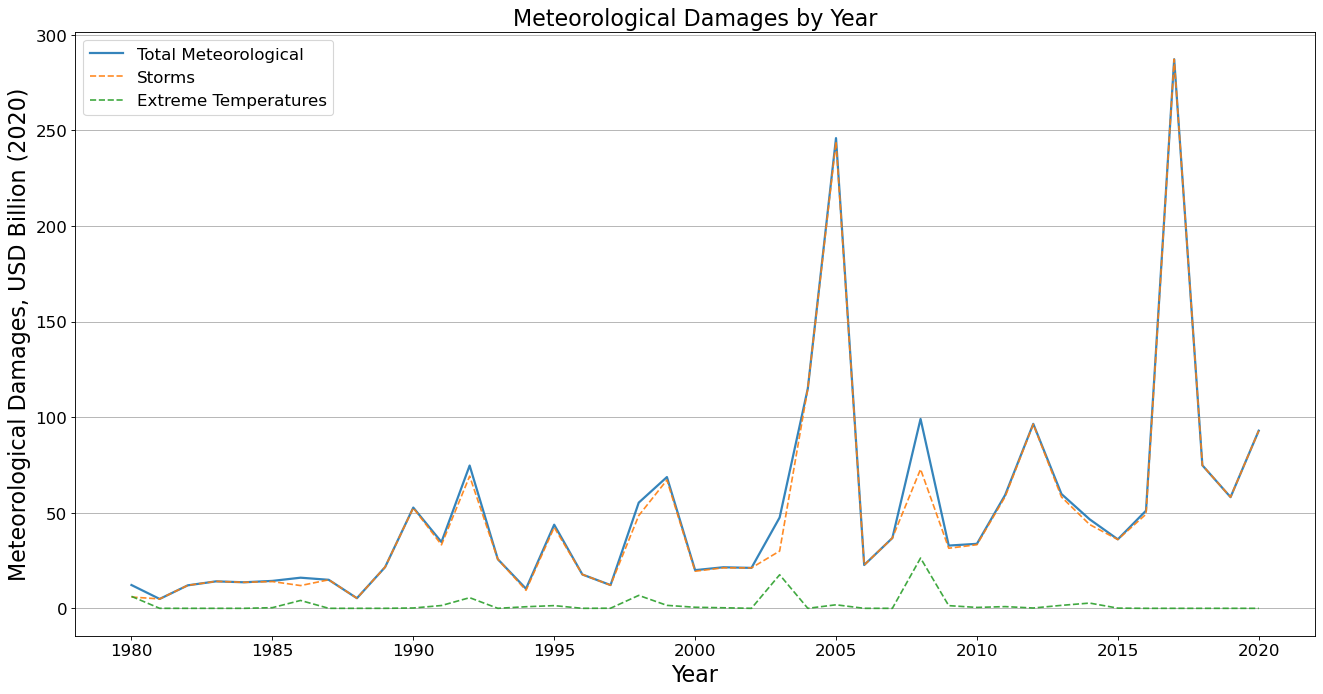

In [11]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Meteorological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Meteorological Damages, USD Billion (2020)")
plt.plot(meteorological_costs.index, meteorological_costs, linewidth=2, alpha = 0.9)
plt.plot(storm_costs.index, storm_costs, linestyle = '--', alpha = 0.9)
plt.plot(extreme_temp_costs.index, extreme_temp_costs, linestyle = '--', alpha = 0.9)

plt.legend(['Total Meteorological', 'Storms', 'Extreme Temperatures'])

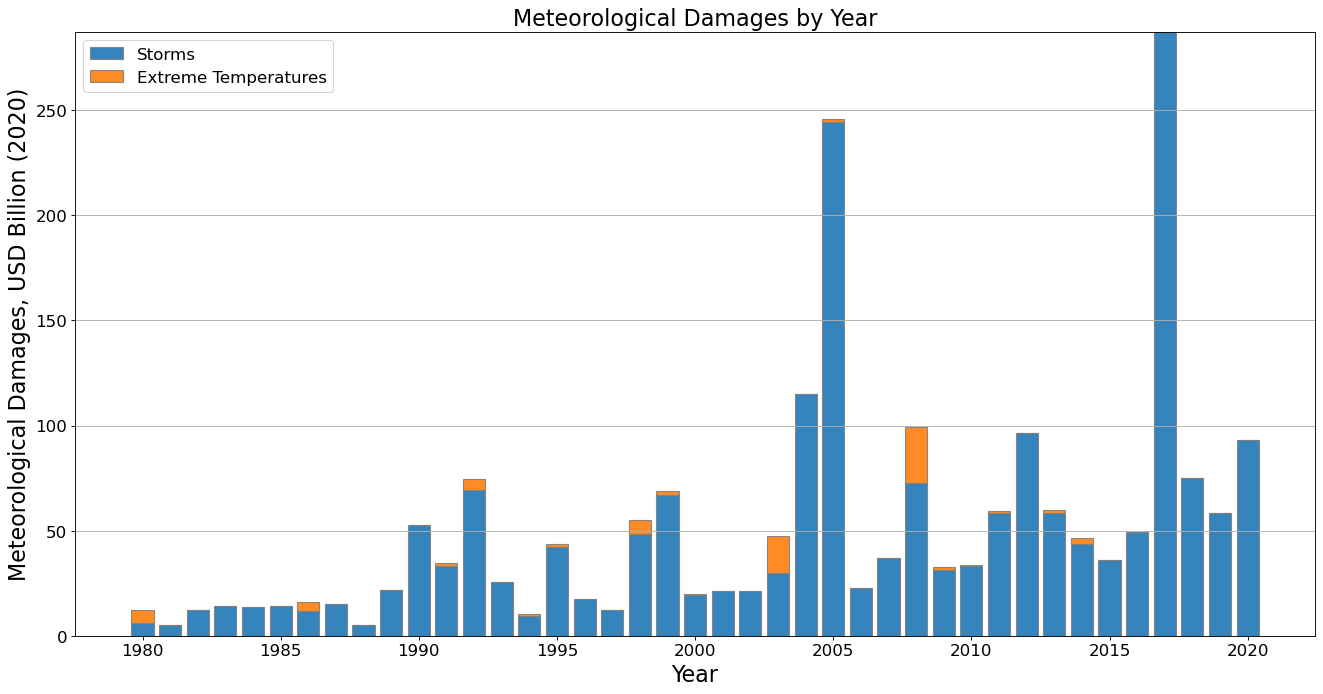

In [12]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Meteorological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Meteorological Damages, USD Billion (2020)")

plt.bar(storm_costs.index, storm_costs, edgecolor = 'grey', alpha = 0.9)
plt.bar(extreme_temp_costs.index, extreme_temp_costs, bottom = storm_costs, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Storms', 'Extreme Temperatures'])

# BOXPLOT METEOROLOGICAL DAMAGES BY DECADE

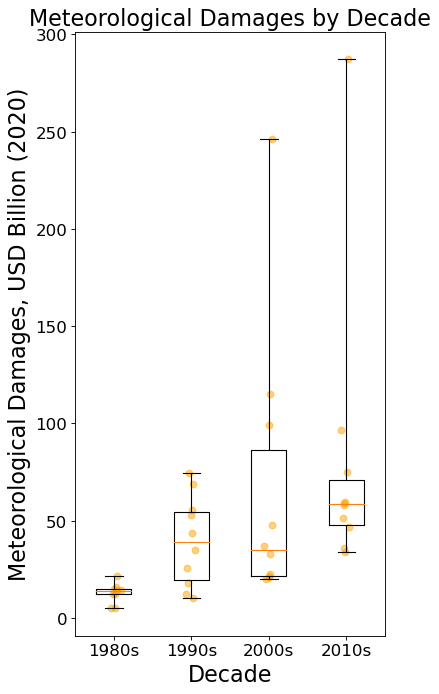

In [13]:
meteorological_box_data = [meteorological_costs[0:10], meteorological_costs[10:20], meteorological_costs[20:30], meteorological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Meteorological Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Meteorological Damages, USD Billion (2020)")

plt.boxplot(meteorological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,meteorological_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,meteorological_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,meteorological_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,meteorological_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER COSTS

In [14]:
# total meteorological cost change 1980-2020
meteorological_costs_1980 = meteorological_costs[1980]
meteorological_costs_2020 = meteorological_costs[2020]
cost_percent_change_meteorological_1980_to_2020 = 100*(meteorological_costs_2020-meteorological_costs_1980)/meteorological_costs_1980
print("Meteorological Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_meteorological_1980_to_2020))

# storm cost change 1980-2020
storm_costs_1980 = storm_costs[1980]
storm_costs_2020 = storm_costs[2020]
cost_percent_change_storm_1980_to_2020 = 100*(storm_costs_2020-storm_costs_1980)/storm_costs_1980
print("Storm Disaster Costs Change (1980-2020): {:.2f}%".format(cost_percent_change_storm_1980_to_2020))

# extreme temperature cost change 1980-2020
extreme_temps_costs_1980 = extreme_temp_costs[1980]
extreme_temps_costs_2020 = extreme_temp_costs[2020]
cost_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temps_costs_2020-extreme_temps_costs_1980)/extreme_temps_costs_1980
print("Extreme Temperature Disaster Change (1980-2020): {:.2f}%".format(cost_percent_change_extreme_temp_1980_to_2020))

# total meteorological cost statistical data
print("\nTotal meteorological Cost Statistical Data: ")
print(meteorological_costs.describe())

# 1980s meteorological cost statistical data
print("\n1980s meteorological Cost Statistical Data: ")
print(meteorological_costs[0:10].describe())

# 1990s meteorological cost statistical data
print("\n1990s meteorological Cost Statistical Data: ")
print(meteorological_costs[10:20].describe())

# 2000s meteorological cost statistical data
print("\n2000s meteorological Cost Statistical Data: ")
print(meteorological_costs[20:30].describe())

# 2010s meteorological cost statistical data
print("\n2010s meteorological Cost Statistical Data: ")
print(meteorological_costs[30:40].describe())

print("\n")

# meteorological costs statistical changes 1980s-2010s
meteorological_mean_costs_1980s = meteorological_costs[0:10].mean()
meteorological_mean_costs_2010s = meteorological_costs[30:40].mean()
mean_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_costs_2010s-meteorological_mean_costs_1980s)/meteorological_mean_costs_1980s
print("Mean meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_meteorological_1980_to_2020))

meteorological_max_costs_1980s = meteorological_costs[0:10].max()
meteorological_max_costs_2010s = meteorological_costs[30:40].max()
max_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_costs_2010s-meteorological_max_costs_1980s)/meteorological_max_costs_1980s
print("Max meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_meteorological_1980_to_2020))

meteorological_min_costs_1980s = meteorological_costs[0:10].min()
meteorological_min_costs_2010s = meteorological_costs[30:40].min()
min_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_costs_2010s-meteorological_min_costs_1980s)/meteorological_min_costs_1980s
print("Min meteorological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_meteorological_1980_to_2020))

# storm costs statistical changes 1980s-2010s
storm_mean_costs_1980s = storm_costs[0:10].mean()
storm_mean_costs_2010s = storm_costs[30:40].mean()
mean_costs_percent_change_storm_1980_to_2020 = 100*(storm_mean_costs_2010s-storm_mean_costs_1980s)/storm_mean_costs_1980s
print("Mean storm Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_storm_1980_to_2020))

storm_max_costs_1980s = storm_costs[0:10].max()
storm_max_costs_2010s = storm_costs[30:40].max()
max_costs_percent_change_storm_1980_to_2020 = 100*(storm_max_costs_2010s-storm_max_costs_1980s)/storm_max_costs_1980s
print("Max storm Disaster Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_storm_1980_to_2020))

storm_min_costs_1980s = storm_costs[0:10].min()
storm_min_costs_2010s = storm_costs[30:40].min()
min_costs_percent_change_storm_1980_to_2020 = 100*(storm_min_costs_2010s-storm_min_costs_1980s)/storm_min_costs_1980s
print("Min storm Disaster Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_storm_1980_to_2020))

# extreme temperature costs statistical changes 1980s-2010s
extreme_temp_mean_costs_1980s = extreme_temp_costs[0:10].mean()
extreme_temp_mean_costs_2010s = extreme_temp_costs[30:40].mean()
mean_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_mean_costs_2010s-extreme_temp_mean_costs_1980s)/extreme_temp_mean_costs_1980s
print("Mean Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_extreme_temp_1980_to_2020))

extreme_temp_max_costs_1980s = extreme_temp_costs[0:10].max()
extreme_temp_max_costs_2010s = extreme_temp_costs[30:40].max()
max_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_max_costs_2010s-extreme_temp_max_costs_1980s)/extreme_temp_max_costs_1980s
print("Max Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_extreme_temp_1980_to_2020))

extreme_temp_min_costs_1980s = extreme_temp_costs[0:10].min()
extreme_temp_min_costs_2010s = extreme_temp_costs[30:40].min()
min_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_min_costs_2010s-extreme_temp_min_costs_1980s)/extreme_temp_min_costs_1980s
print("Min Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_extreme_temp_1980_to_2020))

Meteorological Disaster Costs Change (1980-2020): 662.42%
Storm Disaster Costs Change (1980-2020): 1469.27%
Extreme Temperature Disaster Change (1980-2020): -100.00%

Total meteorological Cost Statistical Data: 
count     41.000000
mean      50.812162
std       57.079535
min        4.901970
25%       16.020657
50%       34.682344
75%       59.243479
max      287.256788
Name: Total Damages, dtype: float64

1980s meteorological Cost Statistical Data: 
count    10.000000
mean     12.898211
std       4.895956
min       4.901970
25%      12.073083
50%      13.862893
75%      14.776082
max      21.548437
Name: Total Damages, dtype: float64

1990s meteorological Cost Statistical Data: 
count    10.000000
mean     39.558125
std      23.150898
min      10.249165
25%      19.692493
50%      39.215546
75%      54.641160
max      74.696982
Name: Total Damages, dtype: float64

2000s meteorological Cost Statistical Data: 
count     10.000000
mean      66.250009
std       71.633825
min       19.97098

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars
